## 7. Overrepresented or underrepresented amino acids

In [54]:
"""
Frequences observed in Veratbrates
"""
reference_frequencies = {'A' : 7.4,
                       'R' : 4.2,
                       'N' : 4.4,
                       'D' : 5.9,
                       'C' : 3.3,
                       'Q' : 3.7,
                       'E' : 5.8,
                       'G' : 7.4,
                       'H' : 2.9,
                       'I' : 3.8,
                       'L' : 7.6,
                       'K' : 7.2,
                       'M' : 1.8,
                       'F' : 4.0,
                       'P' : 5.0,
                       'S' : 8.1,
                       'T' : 6.2,
                       'W' : 1.3,
                       'Y' : 3.3,
                       'V' : 6.8
                      }

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
df2 = pd.read_csv("March_2024_AF2_01.txt", sep=r"\s+", header=None)
df2.columns = ['Protein_number', 'res_number', 'PB1', 'PB2', 'AA1', 'AA2', 'S2_1', 'S2_2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']

In [8]:
df2.shape

(671155, 12)

In [43]:
columns_without_aa = ['Protein_number', 'res_number', 'PB1', 'PB2', 'S2_1', 'S2_2', 'expected_frequency', 'plDDT', 'RSA1', 'RSA2']
df2_amino_acids = df2.drop(columns_without_aa, axis = 1)
df = df2_amino_acids
df

,AA1,AA2
0,G,G
1,E,Q
2,G,N
3,T,V
4,V,P
...,...,...
671150,G,L
671151,C,D
671152,G,P
671153,L,T


In [53]:
total = df.shape[0]
column1_frequencies = df['AA1'].value_counts()
column2_frequencies = df['AA2'].value_counts()
total_frequencies = column1_frequencies.add(column2_frequencies, fill_value=0)
total_frequencies = (total_frequencies / total) * 100
total_frequencies

A    13.979632
C     3.054585
D    10.906274
E    14.844857
F     4.302881
G    23.687673
H     5.119682
I     5.154696
K    10.792887
L    14.204468
M     2.935388
N     8.002622
P     8.423092
Q     9.497955
R    10.015868
S    26.788000
T    14.681258
V     9.380545
W     1.133419
Y     3.094218
Name: count, dtype: float64

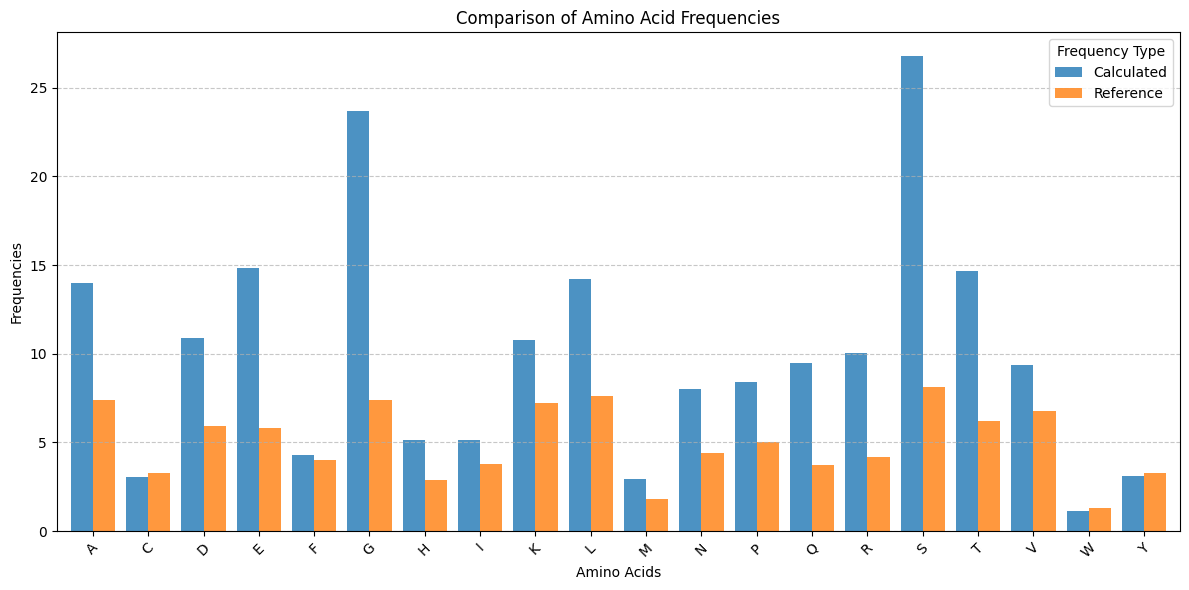

In [56]:
calculated_df = pd.Series(total_frequencies, name='Calculated')
reference_df = pd.Series(reference_frequencies, name='Reference')
comparison_df = pd.DataFrame({'Calculated': calculated_df, 'Reference': reference_df})

# Plot
comparison_df.plot(kind='bar', figsize=(12, 6), width=0.8, alpha=0.8)
plt.title("Comparison of Amino Acid Frequencies")
plt.xlabel("Amino Acids")
plt.ylabel("Frequencies")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Frequency Type")
plt.tight_layout()
plt.show()

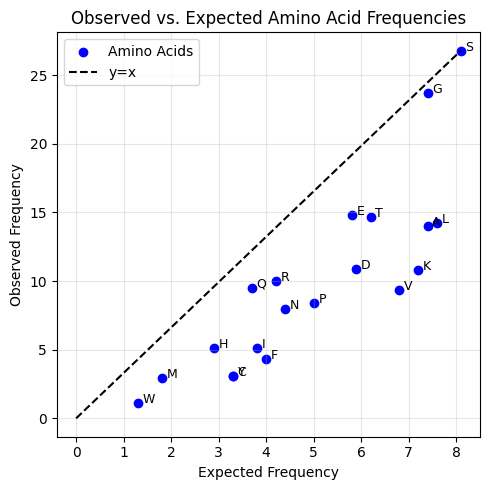

In [62]:
labels = list(total_frequencies.keys())
observed = list(total_frequencies.values)
expected = [reference_frequencies[label] for label in labels]

plt.figure(figsize=(5, 5))
plt.scatter(expected, observed, color='blue', label='Amino Acids')
plt.plot([0, max(expected)], [0, max(observed)], color='black', linestyle='--', label='y=x')

for i, label in enumerate(labels):
    plt.text(expected[i] + 0.1, observed[i], label, fontsize=9)

plt.title("Observed vs. Expected Amino Acid Frequencies")
plt.xlabel("Expected Frequency")
plt.ylabel("Observed Frequency")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()